In [188]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [189]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train['train_test'] = 1
test['train_test'] = 0
all_data = pd.concat([train, test])

In [190]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [191]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [192]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [193]:
train_num = train[['Age', 'SibSp', 'Parch', 'Fare']]
train_cat = train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

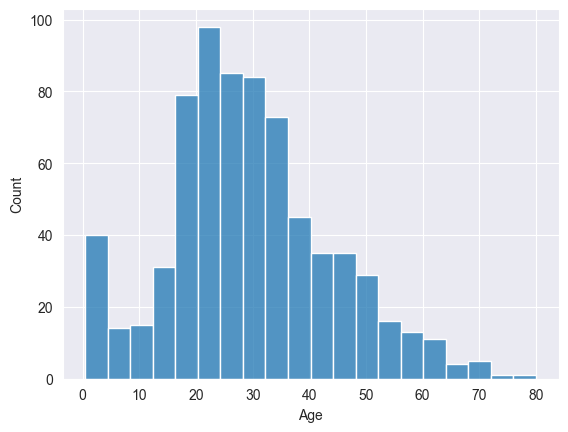

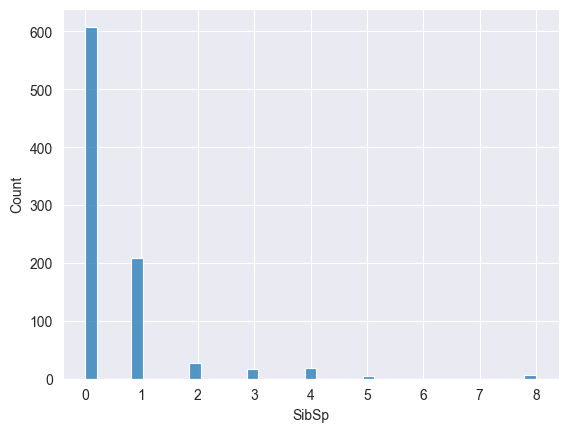

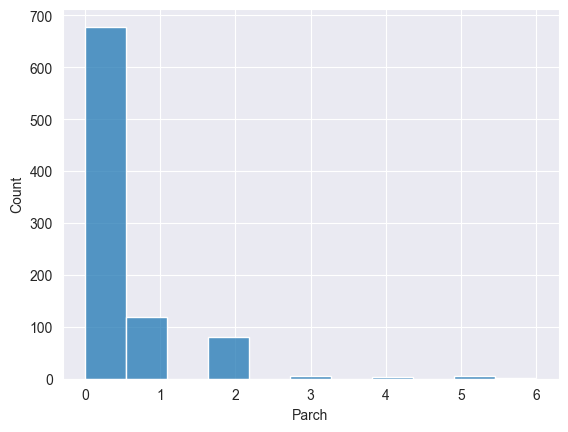

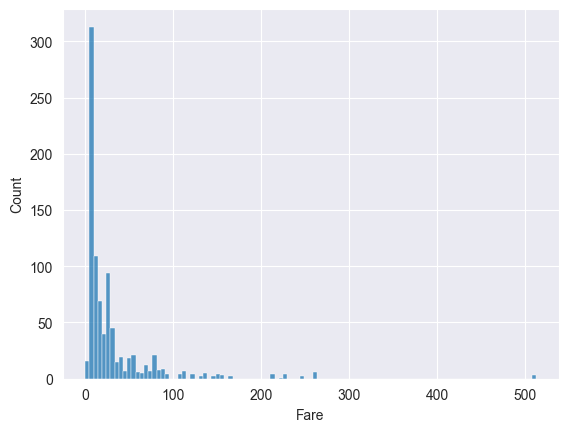

In [194]:
for i, column in enumerate(train_num.columns):
    plt.figure(i)
    sns.histplot(train_num, x=train_num[column])

<Axes: >

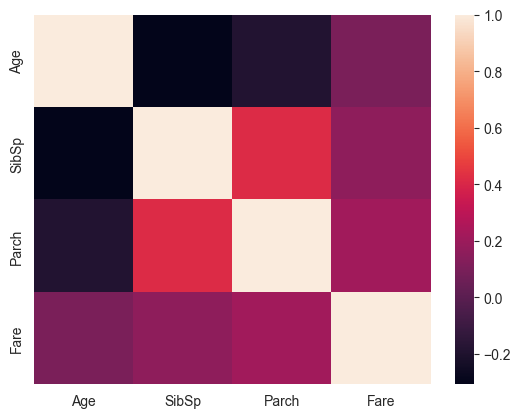

In [195]:
sns.heatmap(train_num.corr())

In [196]:
pd.pivot_table(train, index = 'Survived', values=['Age', 'SibSp', 'Parch', 'Fare'], aggfunc=np.mean)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [197]:
train_cat.head()

,Survived,Pclass,Sex,Ticket,Cabin,Embarked
0,0,3,male,A/5 21171,NaN,S
1,1,1,female,PC 17599,C85,C
2,1,3,female,STON/O2. 3101282,NaN,S
3,1,1,female,113803,C123,S
4,0,3,male,373450,NaN,S


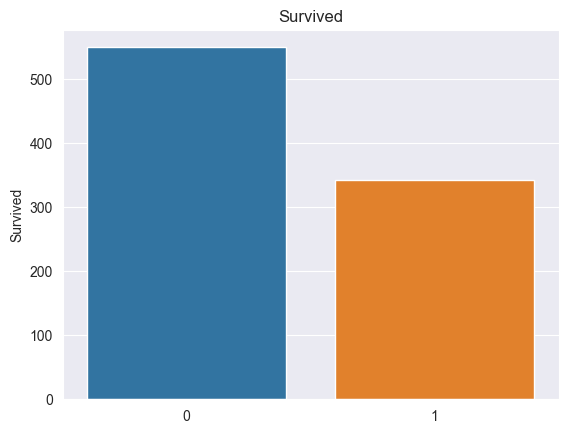

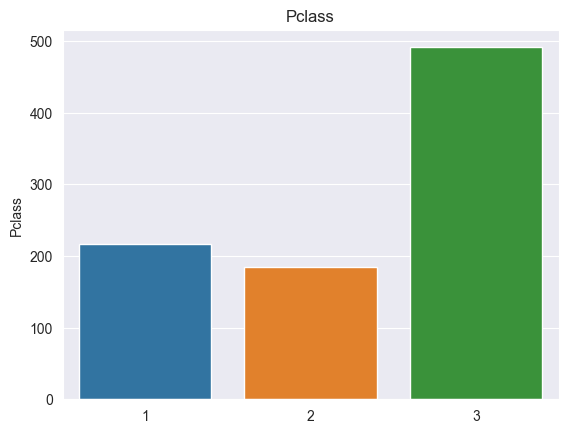

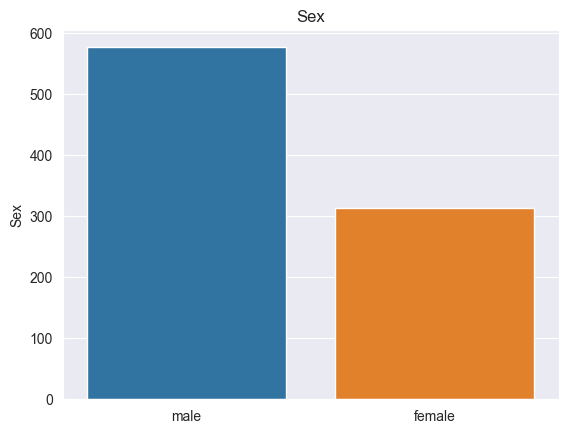

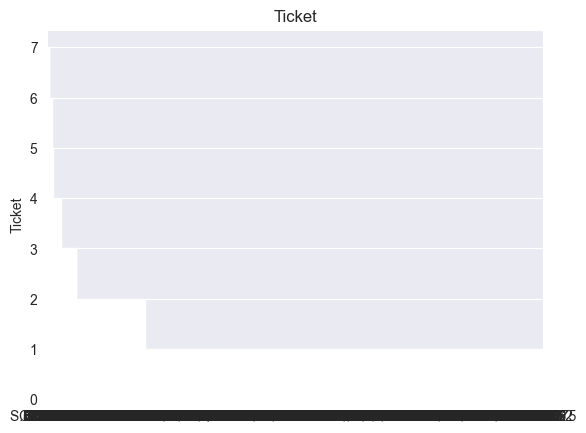

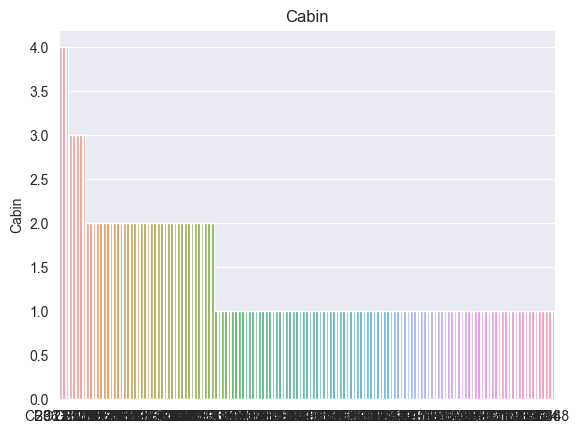

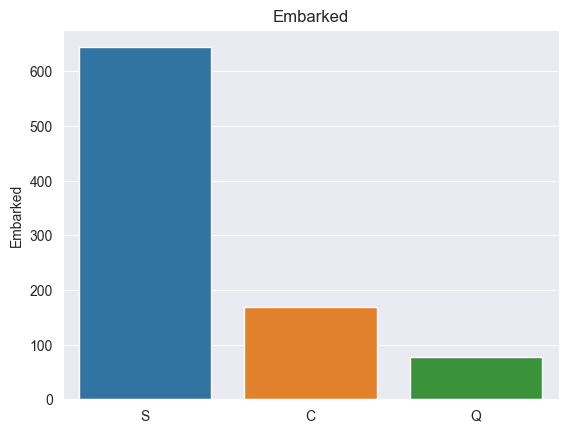

In [198]:
for i, column in enumerate(train_cat.columns):
    plt.figure(i)
    sns.barplot(train_cat, y=train_cat[column].value_counts(), x=train_cat[column].value_counts().index).set_title(column)

In [199]:
pd.pivot_table(train, index='Survived', columns='Pclass', values='Ticket', aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [200]:
pd.pivot_table(train, index='Survived', columns='Sex', values='Ticket', aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [201]:
pd.pivot_table(train, index='Survived', columns='Embarked', values='Ticket', aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [202]:
pd.pivot_table(train, index='Pclass', columns='Sex', values='Ticket', aggfunc='count')

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [203]:
train_cat['Cabin']
train['Cabin_new'] = train['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train['Cabin_new'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin_new, dtype: int64

In [204]:
pd.pivot_table(train, index='Survived', columns='Cabin_new', values='Ticket', aggfunc='count')

Cabin_new,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [205]:
train['Cabin_adv'] = train['Cabin'].apply(lambda x: str(x)[0])
train['Cabin_adv'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_adv, dtype: int64

In [206]:
pd.pivot_table(train, index='Pclass', columns='Cabin_adv', values='Ticket', aggfunc='count')

Cabin_adv,A,B,C,D,E,F,G,T,n
Pclass,,,,,,,,,
1,15.0,47.0,59.0,29.0,25.0,NaN,NaN,1.0,40.0
2,NaN,NaN,NaN,4.0,4.0,8.0,NaN,NaN,168.0
3,NaN,NaN,NaN,NaN,3.0,5.0,4.0,NaN,479.0


In [207]:
pd.pivot_table(train, index='Survived', columns='Cabin_adv', values='Ticket', aggfunc='count')

Cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [208]:
pd.pivot_table(train, index='SibSp', columns='Cabin_adv', values='Ticket', aggfunc='count')

Cabin_adv,A,B,C,D,E,F,G,T,n
SibSp,,,,,,,,,
0,13.0,32.0,29.0,19.0,22.0,8.0,2.0,1.0,482.0
1,2.0,13.0,25.0,14.0,10.0,3.0,2.0,NaN,140.0
2,NaN,2.0,2.0,NaN,NaN,2.0,NaN,NaN,22.0
3,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,13.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0


In [209]:
train['numeric_ticket'] = train['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
train['ticket_letters'] = train['Ticket'].apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/', '').lower() if len(x.split(' ')[:-1]) >0 else 0)
train['ticket_letters']

0          a5
1          pc
2      stono2
3           0
4           0
        ...  
886         0
887         0
888        wc
889         0
890         0
Name: ticket_letters, Length: 891, dtype: object

In [210]:
pd.pivot_table(train, index='Survived', columns='numeric_ticket', values='Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [211]:
pd.pivot_table(train, index='Embarked', columns='numeric_ticket', values='Ticket', aggfunc='count')

numeric_ticket,0,1
Embarked,,
C,61,107
Q,1,76
S,168,476


In [212]:
pd.pivot_table(train, index='Pclass', columns='ticket_letters', aggfunc='count', values='Ticket')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Pclass,,,,,,,,,,,,,,,,,,,,,
1,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,127.0,NaN,NaN,NaN,NaN,19.0,1.0,NaN,NaN,5.0,...,6.0,1.0,2.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN
3,386.0,7.0,21.0,1.0,5.0,22.0,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,2.0,15.0,1.0,18.0,NaN,7.0,NaN


In [213]:
train['Name']
train['name_title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [214]:
train['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [215]:
pd.pivot_table(train, index='Survived', columns='name_title', values='Ticket', aggfunc='count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [216]:
all_data['cabin_multiple'] = all_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data['Cabin'].apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data['Ticket'].apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/', '').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [217]:
all_data['first_number'] = all_data['Ticket'].apply(lambda x: str(x)[0] if x.isnumeric() and 1 <= int(str(x)[0]) <= 3 else 0)

In [219]:
pd.pivot_table(all_data, index='Pclass', columns='first_number', values='Ticket', aggfunc='count')

first_number,0,1,2,3
Pclass,,,,
1,104,193,8,18
2,93,3,176,5
3,195,14,94,406


In [221]:
pd.pivot_table(all_data, index='Survived', columns='first_number', values='Ticket', aggfunc='count')

first_number,0,1,2,3
Survived,,,,
0.0,168,54,98,229
1.0,93,92,85,72


<Axes: >

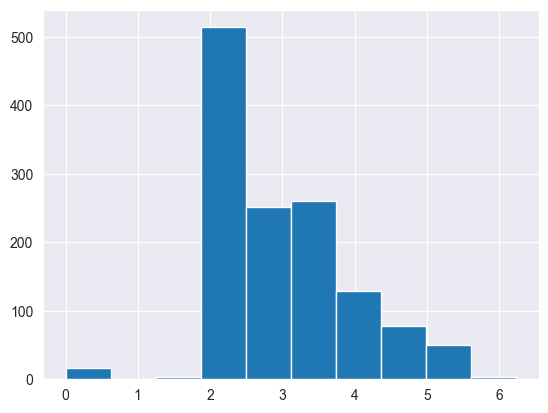

In [222]:
all_data['Age'] = all_data['Age'].fillna(train['Age'].mean())
all_data['Fare'] = all_data['Fare'].fillna(train['Fare'].median())

all_data.dropna(subset=['Embarked'], inplace=True)

all_data['norm_fare'] = np.log(all_data['Fare']+1)
all_data['norm_fare'].hist()

In [223]:
all_data.Pclass = all_data['Pclass'].astype(str)

In [224]:
dum_vars = pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'norm_fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title', 'first_number', 'train_test']])

In [225]:
X_train = dum_vars[dum_vars['train_test'] == 1].drop(['train_test'], axis=1)
X_test = dum_vars[dum_vars['train_test'] == 0].drop(['train_test'], axis=1)
X_train.shape, X_test.shape

y_train = all_data[all_data['train_test'] == 1]['Survived']
y_train.shape

(889,)

In [226]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train[['Age', 'SibSp', 'Parch', 'norm_fare']] = scale.fit_transform(X_train[['Age', 'SibSp', 'Parch', 'norm_fare']])
X_test[['Age', 'SibSp', 'Parch', 'norm_fare']] = scale.transform(X_test[['Age', 'SibSp', 'Parch', 'norm_fare']])
X_test

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess,first_number_0,first_number_1,first_number_2,first_number_3
0,0.373932,-0.475199,-0.474326,-0.807439,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,1.338358,0.431350,-0.474326,-0.909406,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
2,2.495670,-0.475199,-0.474326,-0.609952,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,-0.204724,-0.475199,-0.474326,-0.714193,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,-0.590495,0.431350,0.765897,-0.384820,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.003524,-0.475199,-0.474326,-0.781901,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
414,0.721125,-0.475199,-0.474326,1.799564,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
415,0.682548,-0.475199,-0.474326,-0.877591,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
416,0.003524,-0.475199,-0.474326,-0.781901,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [227]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

In [228]:
sv = SVC()
cv = cross_val_score(sv, X_train, y_train, cv=5)
cv, cv.mean()

(array([0.84831461, 0.82022472, 0.81460674, 0.80337079, 0.86440678]),
 0.8301847267187202)

In [229]:
lr = LogisticRegression()
cv = cross_val_score(lr, X_train, y_train, cv=5)
cv, cv.mean()

(array([0.8258427 , 0.80337079, 0.8258427 , 0.81460674, 0.85875706]),
 0.8256839966990415)

In [230]:
kn = KNeighborsClassifier(n_neighbors=5)
cv = cross_val_score(kn, X_train, y_train, cv=5)
cv, cv.mean()

(array([0.79775281, 0.78651685, 0.84831461, 0.8258427 , 0.84180791]),
 0.820046975179331)

In [231]:
rfc = RandomForestClassifier(random_state=100)
cv = cross_val_score(rfc, X_train, y_train, cv=5)
cv, cv.mean()

(array([0.80337079, 0.78089888, 0.85955056, 0.7752809 , 0.84745763]),
 0.8133117501428299)

In [232]:
gb = GaussianProcessClassifier(random_state=100)
cv = cross_val_score(gb, X_train, y_train, cv=5)
cv, cv.mean()

(array([0.79213483, 0.79775281, 0.84831461, 0.7752809 , 0.84745763]),
 0.812188154637212)

In [233]:
from sklearn.model_selection import GridSearchCV

In [234]:
def performance_try(clf, mdl):
    print(mdl)
    print('Best Score: ', str(clf.best_score_))
    print('Best params: ', str(clf.best_params_))

In [235]:
param_grid = {'C': [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.5],
              'kernel': ['poly', 'rbf', 'sigmoid'],
              'degree': [1, 2, 3],
              'gamma': ['scale', 'auto'],}

clf_sv = GridSearchCV(sv, param_grid=param_grid, cv = 5, verbose=True, n_jobs=-1)
best_clf_sv = clf_sv.fit(X_train, y_train)
performance_try(best_clf_sv, 'Support Vector Classifier')

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Support Vector Classifier
Best Score:  0.833561861232781
Best params:  {'C': 0.8, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


In [236]:
best_ml = best_clf_sv.best_estimator_.fit(X_train, y_train)

In [242]:
y_test = best_ml.predict(X_test).astype(int)
submission = {'PassengerId': test.PassengerId, 'Survived': y_test}
submission = pd.DataFrame(data=submission)
submission.to_csv('titanic_svm.csv', index=False)